In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

df = pd.read_csv('S395_cluster_std.65_D10/student-dataset.csv')

In [9]:
X = np.array(df.drop('Student', axis = 1))

In [55]:
from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters=5, random_state=0)

In [56]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [57]:
kmeans.labels_

array([2, 4, 4, 0, 0, 2, 3, 0, 0, 3, 3, 2, 0, 1, 3, 3, 0, 4, 2, 4, 3, 3,
       2, 0, 3, 3, 0, 1, 2, 3, 2, 3, 4, 4, 3, 2, 1, 0, 4, 2, 0, 0, 2, 1,
       3, 1, 3, 0, 3, 1, 4, 4, 1, 1, 2, 3, 3, 2, 4, 1, 2, 2, 2, 0, 2, 1,
       1, 3, 0, 4, 2, 3, 4, 1, 0, 1, 4, 4, 2, 4, 2, 0, 1, 1, 2, 1, 4, 4,
       1, 4, 0, 2, 0, 3, 3, 1, 3, 4, 3, 2, 1, 2, 1, 3, 3, 3, 2, 4, 2, 4,
       4, 2, 4, 0, 0, 4, 4, 3, 1, 1, 1, 0, 3, 1, 2, 2, 4, 4, 4, 1, 3, 2,
       1, 3, 4, 2, 3, 4, 4, 0, 2, 2, 2, 4, 2, 1, 1, 1, 2, 1, 0, 2, 0, 3,
       3, 4, 4, 0, 0, 1, 3, 1, 2, 3, 1, 0, 4, 0, 3, 0, 3, 4, 0, 0, 0, 3,
       1, 0, 2, 3, 3, 1, 0, 1, 0, 0, 0, 2, 4, 2, 4, 1, 0, 1, 3, 1, 2, 4,
       1, 0, 4, 1, 4, 2, 4, 0, 3, 4, 4, 3, 4, 0, 0, 1, 2, 0, 4, 2, 1, 2,
       1, 3, 1, 1, 0, 1, 4, 3, 3, 0, 0, 2, 2, 1, 0, 2, 0, 4, 0, 3, 0, 1,
       3, 1, 3, 2, 4, 3, 3, 1, 3, 1, 2, 4, 1, 4, 4, 2, 3, 2, 4, 3, 4, 2,
       3, 1, 3, 4, 4, 0, 0, 0, 1, 0, 4, 4, 3, 2, 0, 2, 4, 4, 4, 4, 4, 2,
       1, 0, 0, 2, 0, 4, 1, 0, 3, 2, 0, 0, 2, 3, 2,

In [68]:
df['grupos'] = kmeans.labels_

In [59]:
df

,Student,pref_audio,pref_image,pref_infographic,pref_games,pref_webpgs,pref_table,pref_text,pref_tutorial,pref_video,pref_forum,K-classes
0,1,5,0,7,0,2,3,1,7,9,8,2
1,2,9,8,4,7,4,8,0,6,2,7,4
2,3,10,9,4,7,5,9,0,6,3,7,4
3,4,0,0,4,7,1,3,1,1,8,7,0
4,5,1,0,3,6,0,4,1,1,7,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,1,0,3,7,0,4,2,1,8,7,0
391,392,9,0,4,4,4,5,7,5,8,4,3
392,393,5,0,7,1,1,4,1,7,9,8,2
393,394,0,0,3,6,0,3,1,1,7,6,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


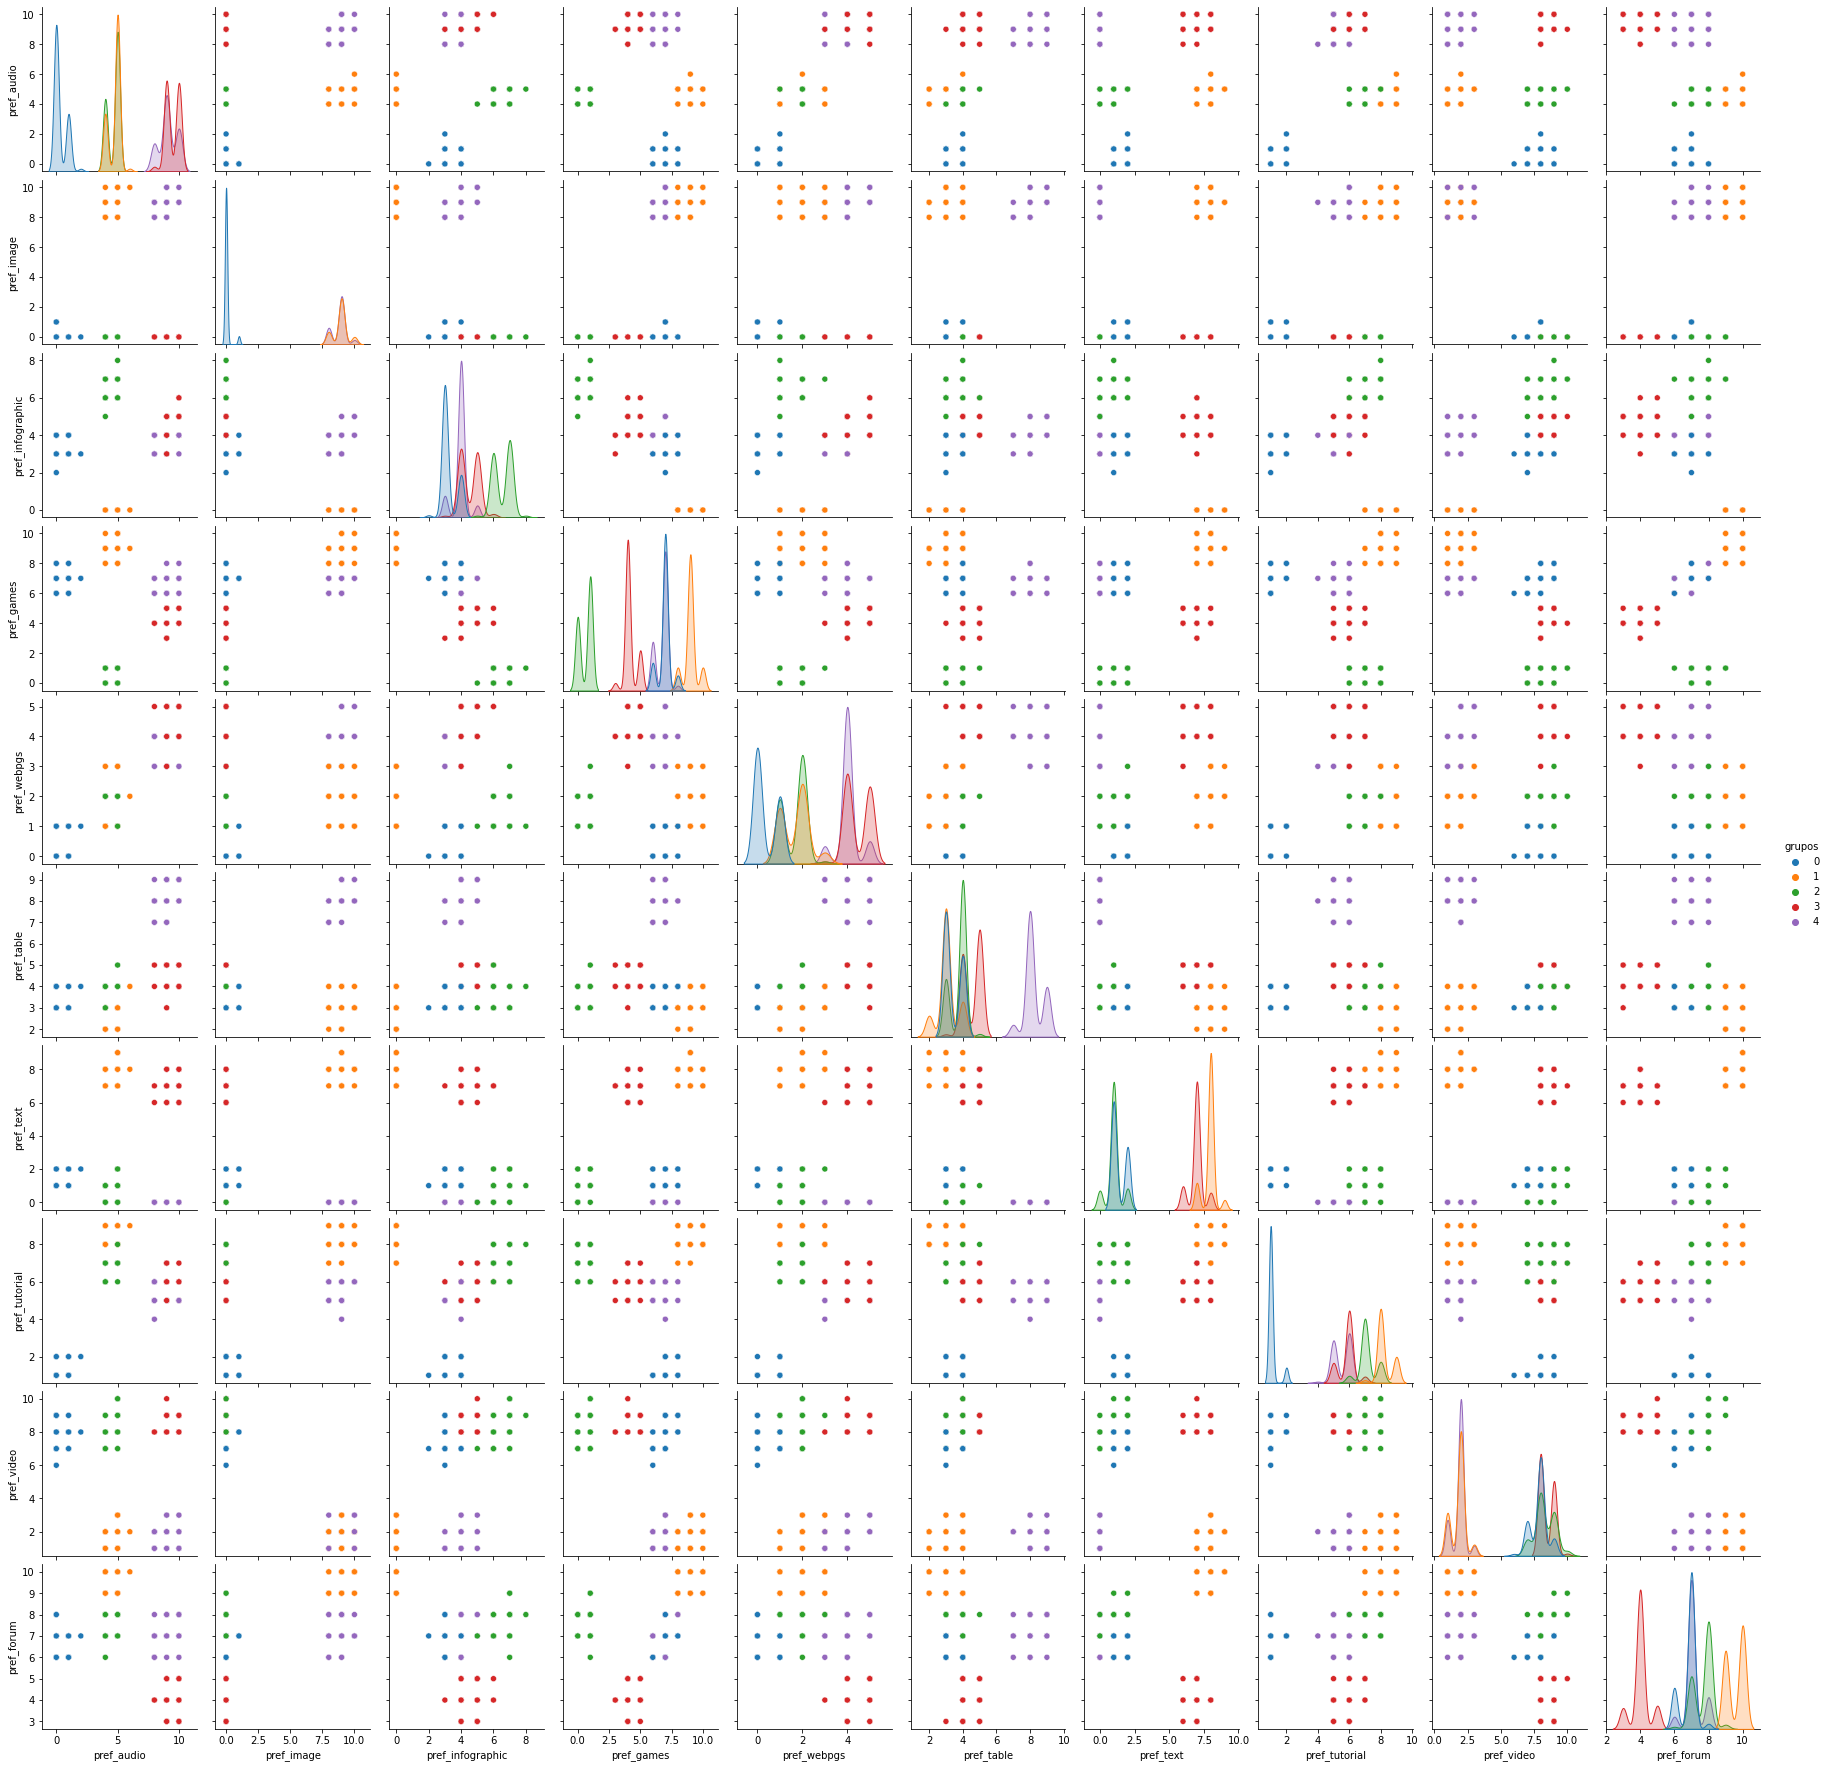

In [69]:
sb.pairplot(df.drop('Student', axis = 1), hue='grupos', palette=sb.color_palette("tab10", n_colors=5))

In [62]:
from sklearn import metrics
from scipy.spatial.distance import cdist

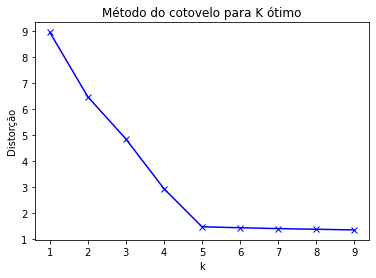

In [67]:
K = range(1,10)
distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
pl.plot(K, distortions, 'bx-')
pl.xlabel('k')
pl.ylabel('Distorção')
pl.title('Método do cotovelo para K ótimo')
pl.show()